In [1]:
import pandas as pd
import requests

import matplotlib.pyplot as plt
import seaborn as sns

import os
import acquire as a
import prepare as p

# Superstore

In [2]:
df = p.get_superstore()
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,day_of_week,month,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Tuesday,January,10.92
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Tuesday,January,30.16
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,Tuesday,January,308.48
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Tuesday,January,197.55
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Tuesday,January,25.16



> Train, Test
- using percentage based split

In [3]:
# set train size and parameters
train_size = 0.70 
n = df.shape[0] 
test_start_index = round(train_size * n)

In [4]:
#identify start index
train = df.iloc[:test_start_index] 
test = df.iloc[test_start_index:] 

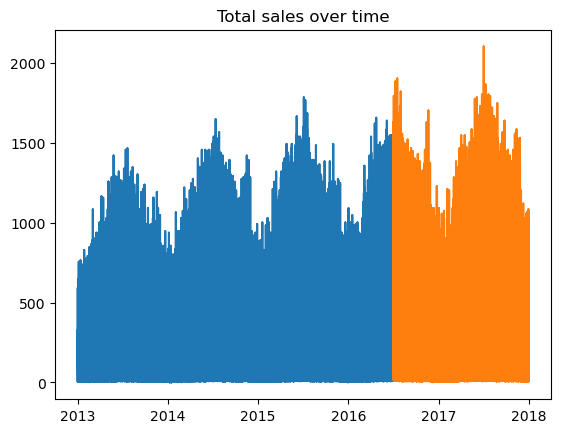

In [5]:
# plot train and test data sets
plt.plot(train.sales_total)
plt.plot(test.sales_total)
plt.title('Total sales over time')
plt.show()

# Target 
- My target variable is total sales

In [6]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

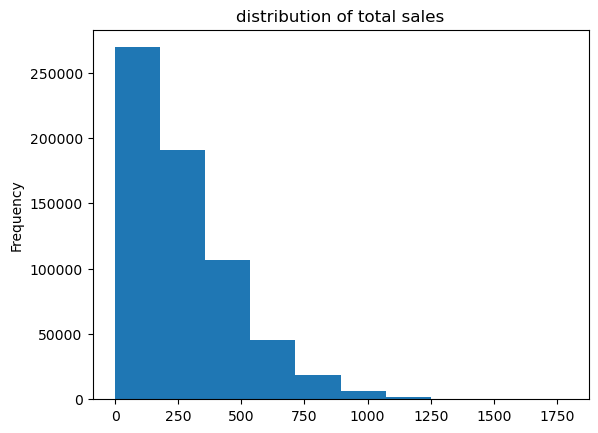

In [7]:
#Distribution of target
train.sales_total.plot.hist()
plt.title('distribution of total sales')
plt.show()

# Blow off time series

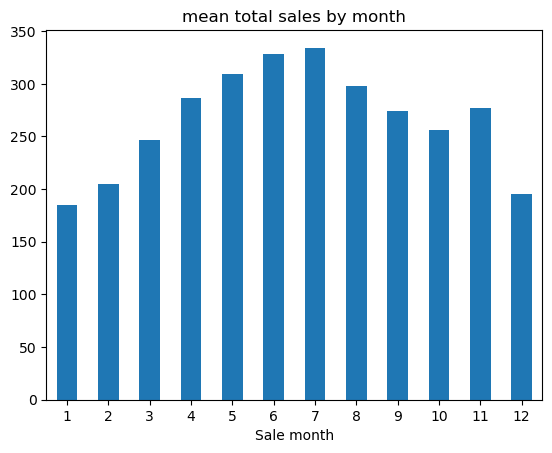

In [9]:
#plot total sales by month
train.groupby(train.index.month).sales_total.mean()\
.plot.bar().tick_params('x', rotation=0)

plt.title('mean total sales by month')
plt.xlabel('Sale month')
plt.show()

# Target over time

In [10]:
#view columns
train.columns

Index(['item', 'sale_amount', 'sale_id', 'store', 'item_brand', 'item_id',
       'item_name', 'item_price', 'item_upc12', 'item_upc14', 'store_address',
       'store_city', 'store_id', 'store_state', 'store_zipcode', 'day_of_week',
       'month', 'sales_total'],
      dtype='object')

In [11]:
y.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

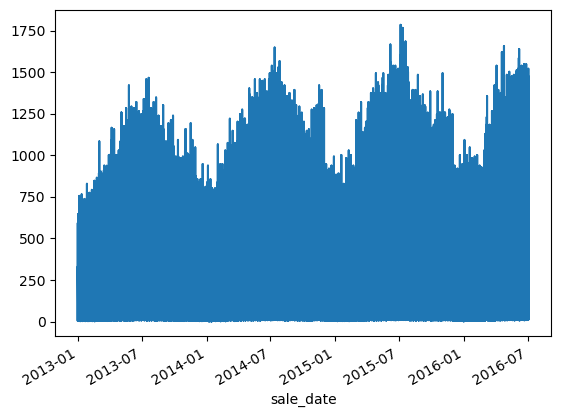

In [14]:
y.plot();

In [15]:
# Target averaged over various periods

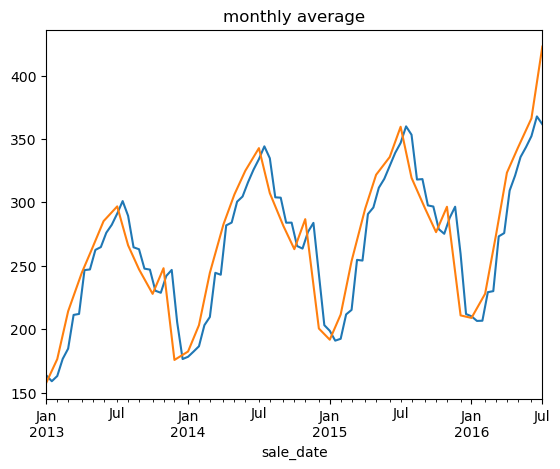

In [22]:
y.resample('2W').mean().plot(title='bi-weekly average')
y.resample('M').mean().plot(title='monthly average');

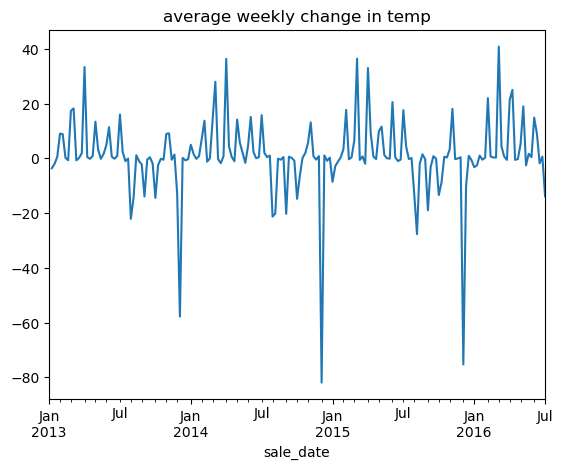

In [26]:
#change in target over time
y.resample('W').mean().diff().plot(title='average weekly change in temp');

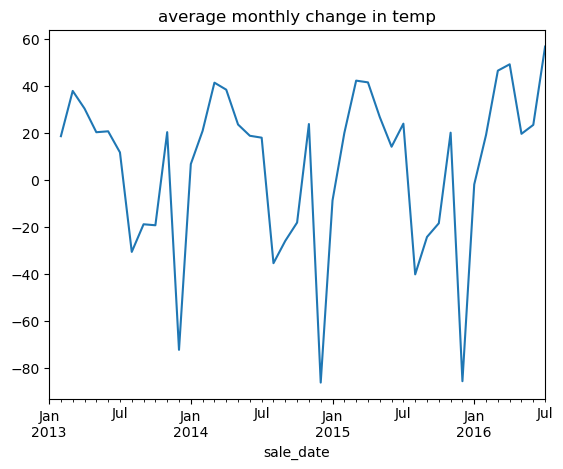

In [27]:
y.resample('M').mean().diff().plot(title='average monthly change in temp');

# Seasonal Subseries Plot

In [28]:
# make my pivot table of years to month with unstack()
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,157.894723,176.411855,214.181650,244.460082,264.663123,285.261279,296.881241,266.183375,247.237694,227.868064,248.108656,175.753692
2014,182.410791,203.207122,244.488991,282.786091,306.267538,324.965376,342.849100,307.345466,281.350430,263.133772,286.821036,200.538977
2015,191.725206,211.589839,253.739390,295.147608,321.813672,335.850784,359.698008,319.435676,295.088416,276.572155,296.583045,210.886208
2016,208.900519,227.977512,274.367406,323.461873,342.986382,366.316222,422.947300,NaN,NaN,NaN,NaN,NaN


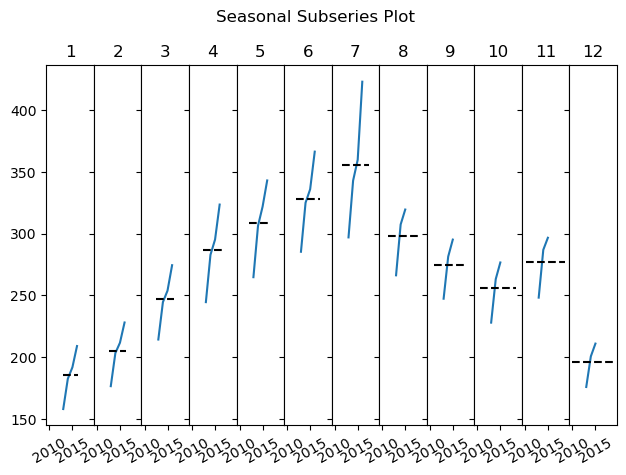

In [29]:
# unpacking my figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

# Autocorrelation

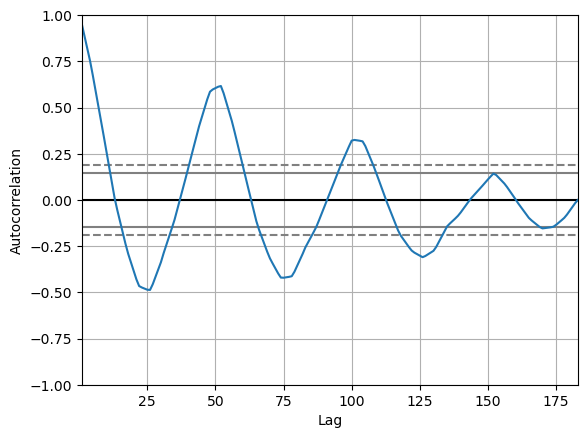

In [30]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())
plt.show()

# Germany

In [31]:
df = p.get_germany()
df.head()

,consumption,wind,solar,wind_solar,month,year,other_energy_sources
date,,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,January,2012,714.076
2012-01-02,1269.581,207.327,6.574,213.901,January,2012,1055.680
2012-01-03,1334.745,473.468,24.679,498.147,January,2012,836.598
2012-01-04,1347.136,499.804,14.681,514.485,January,2012,832.651
2012-01-05,1376.658,523.851,5.071,528.922,January,2012,847.736


> Train, Test